In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
msu = {
    1001: 'KoU',
    1002: 'ViVe',
    1003: 'Tahko',
    1004: 'Manse',
    1005: 'SoJy',
    1006: 'KPL',
    1007: 'JyJu',
    1008: 'IPV',
    1009: 'JoMa',
    1010: 'KaMa',
    1011: 'KeKi',
    1012: 'KiPa',
    1013: 'PattU',
    1014: 'SiiPe',
    1015: 'HP'
}

nsu = {
    2001: 'Fera',
    2002: 'Tahko',
    2003: 'JoMa',
    2004: 'KeKi',
    2005: 'Kirittäret',
    2006: 'Virkiä',
    2007: 'Manse',
    2008: 'MyVe',
    2009: 'PesäYsit',
    2010: 'Pesäkarhut',
    2011: 'SMJ',
    2012: 'SiiPe',
    2013: 'Roihu'
}

In [4]:
league = 'nsu'
base = 1

if league == 'nsu':
   msu = nsu

weekly_msu = pd.read_csv('./runs_by_week_{}_2021.csv'.format(league), low_memory=False)

weekly_msu = weekly_msu[weekly_msu['base'] == base]

In [5]:
weeks = weekly_msu['week'].unique()
teams = weekly_msu['team'].unique()

tables = []

for week in weeks:
    week_runs = weekly_msu[weekly_msu['week'] == week]
    sort = week_runs.sort_values(by="average_aika")
    sort.loc[:,'position'] = range(0, len(sort.index))
    
    tables.append(sort)

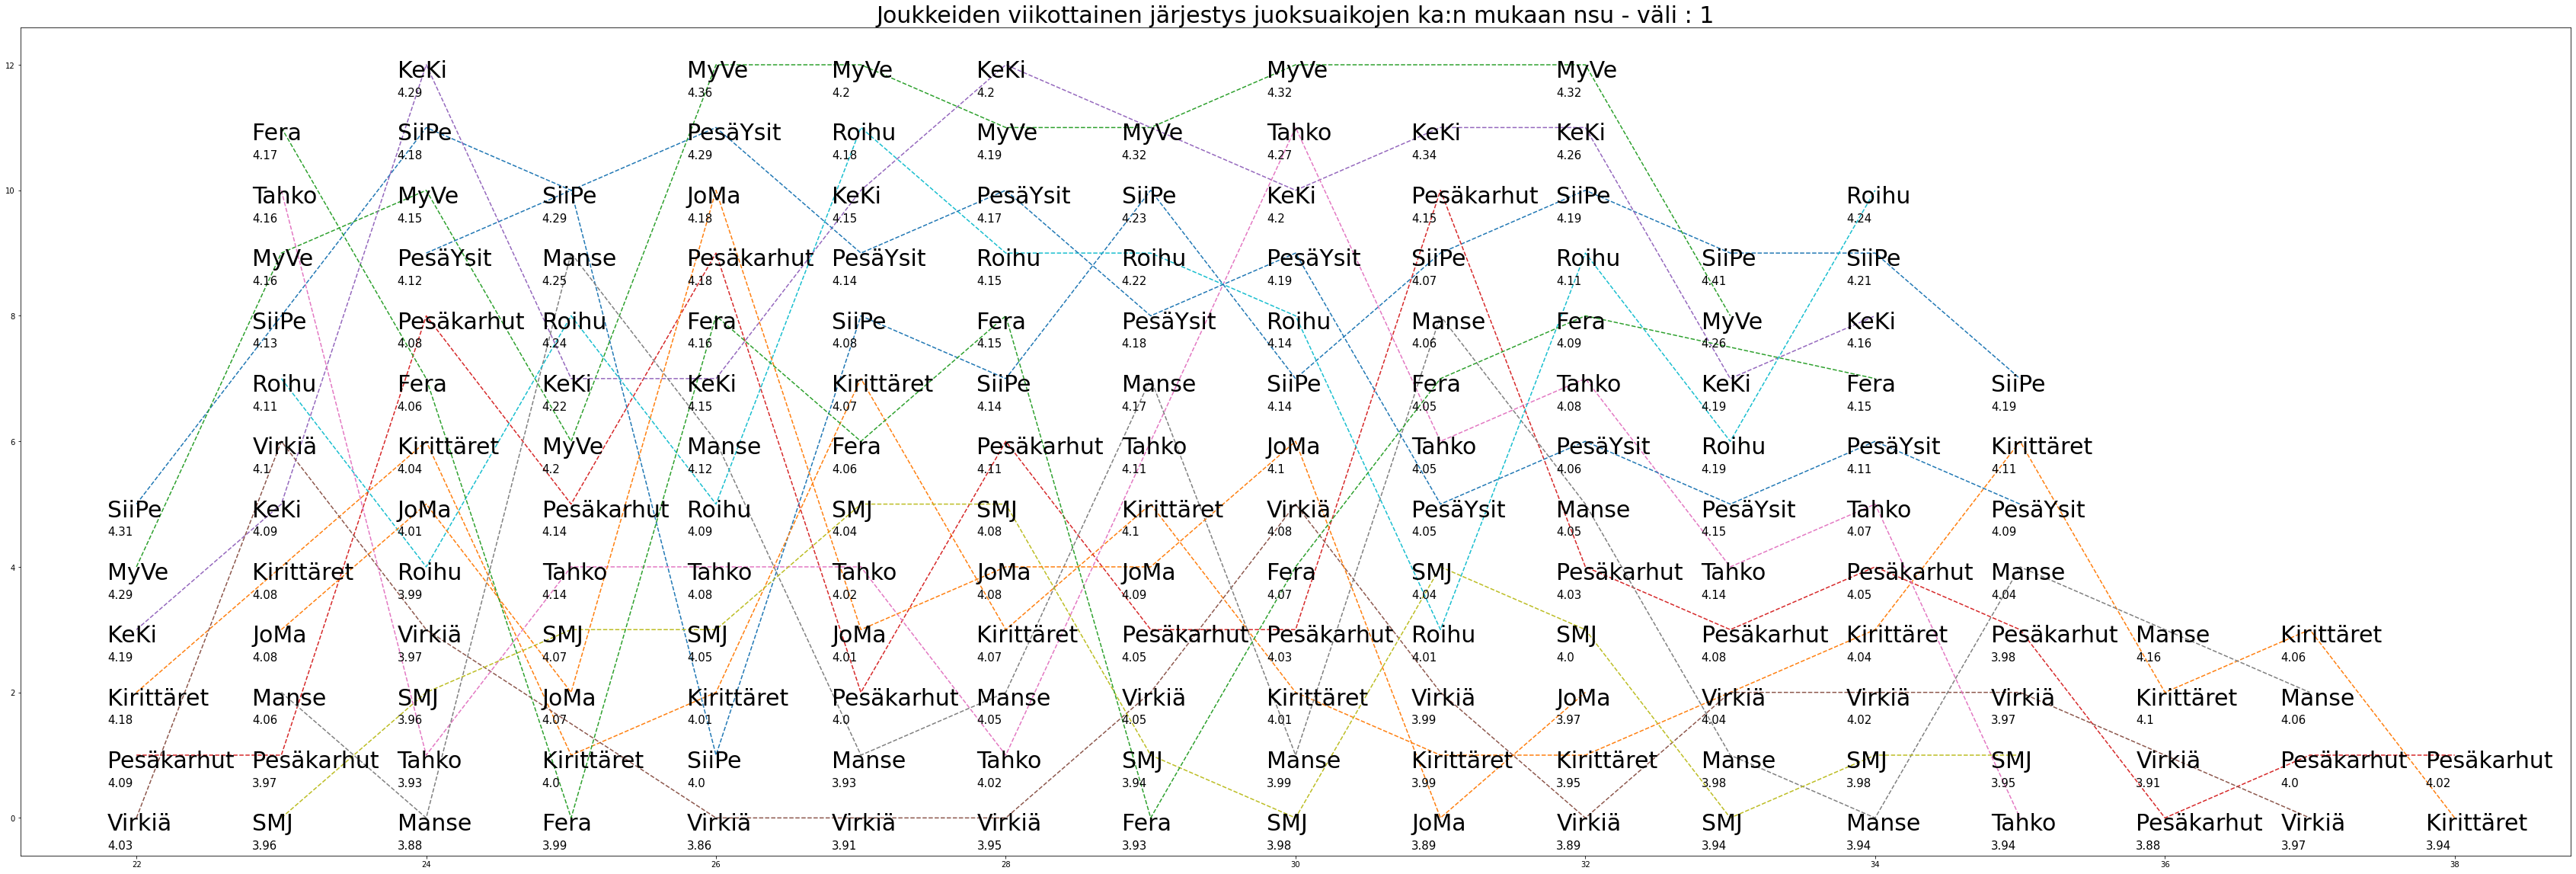

In [6]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (60, 20))

for team in teams:
    team_positions = []

    team_positions = []

    for week_table in tables:
        team_positions.append(week_table[week_table['team'] == team])

    asd = pd.concat(team_positions)

    y = asd['position']
    x = asd['week']
    times = asd['average_aika']
    

    #ax1.plot(x, y, ls=(0, (3, 5, 1, 5)))
    ax1.plot(x, y, ls="--")
    # ax1.grid()
    
    for index, (i,j) in enumerate(zip(x,y)):
        corr = -0.2 # adds a little correction to put annotation in marker's centrum
        ax1.annotate(str(msu[team]),  xy=(i + corr, j + corr), color="#000", fontsize=30)        
        ax1.annotate(str(round(times.iloc[[index]].iloc[0], 2)),  xy=(i + corr, j + corr - .3), color="#000", fontsize=15)
        
ax1.set_title('Joukkeiden viikottainen järjestys juoksuaikojen ka:n mukaan {} - väli : {}'.format(league, base), fontsize=30)

fig.savefig('./viikottainen_järjestys_{}_{}.png'.format(base, league))